# GF($2^m$) Inverse

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `GF2Inverse`
Out of place inversion for elements in GF($2^m$)

Given a quantum register storing elements from GF($2^m$), this bloq computes the inverse
of the given element in a new output register, out-of-place. Specifically,
it implements the transformation

$$
    |a\rangle |0\rangle \rightarrow |a\rangle |a^{-1}\rangle
$$

Inverse is computed by using Fermat's little theorem for Finite Fields, which states that
for a finite field $\mathbb{F}$ with $m$ elements, $\forall a \in \mathbb{F}$
$$
    a^{m} = a
$$

When the finite field is GF($2^m$), Fermat's little theorem can be used to obtain the relation

$$
    a^{-1} = a^{2^m - 2}
$$

The exponential $a^{2^m - 2}$ is computed using $\mathcal{O}(m)$ squaring and
$\mathcal{O}(\log_2(m))$ multiplications via Itoh-Tsujii inversion. The algorithm is described on
page 4 and 5 of Ref[1] and resembles binary exponentiation. The inverse is computed as $B_{n-1}^2$,
where $B_1 = x$ and $B_{i+j} = B_i B_j^{2^i}$.

#### Parameters
 - `bitsize`: The degree $m$ of the galois field $GF(2^m)$. Also corresponds to the number of qubits in the input register whose inverse should be calculated. 

#### Registers
 - `x`: Input THRU register of size $m$ that stores elements from $GF(2^m)$.
 - `result`: Output RIGHT register of size $m$ that stores $x^{-1}$ from $GF(2^m)$.
 - `junk`: Output RIGHT register of size $m$ and shape ($m - 2$) that stores results from intermediate multiplications. 

#### References
 - [Efficient quantum circuits for binary elliptic curve arithmetic: reducing T-gate complexity](https://arxiv.org/abs/1209.6348). Amento et al. 2012. Section 2.3
 - [Structure of parallel multipliers for a class of fields GF(2^m)](https://doi.org/10.1016/0890-5401(89)90045-X). Itoh and Tsujii. 1989.


In [2]:
from qualtran.bloqs.gf_arithmetic import GF2Inverse

### Example Instances

In [3]:
gf16_inverse = GF2Inverse(4)

In [4]:
import sympy

m = sympy.Symbol('m')
gf2_inverse_symbolic = GF2Inverse(m)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([gf16_inverse],
           ['`gf16_inverse`'])

### Call Graph

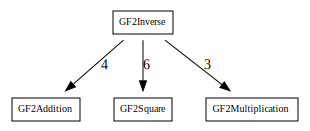

#### Counts totals:
 - `GF2Addition`: 4
 - `GF2Multiplication`: 3
 - `GF2Square`: 6

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
gf16_inverse_g, gf16_inverse_sigma = gf16_inverse.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(gf16_inverse_g)
show_counts_sigma(gf16_inverse_sigma)